In [2]:
from metaspace import SMInstance, sm_annotation_utils
import re
import networkx as nx
import numpy as np
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import seaborn as sns
from collections import Counter
import pandas as pd
import umap
%load_ext autoreload
%autoreload 2

## Coloring of features

In [97]:
metadata_dict = pickle.load(open('metaspacedata_300922/metadata_dict_300922.pickle', 'rb'))

In [69]:
dss = pickle.load(open('metaspacedata_300922/all_datasets_300922.pickle', 'rb'))

In [98]:
matrix_dict = {}
for d in dss:
    matrix_dict[d.id] = d.metadata['Sample_Preparation']['MALDI_Matrix']

In [99]:
metadata_dict['MALDI_matrix'] = matrix_dict

In [100]:
metadata_dict.keys()

dict_keys(['Organism', 'Condition', 'Organism_Part', 'Polarity', 'Group', 'MALDI_matrix'])

**Organism**

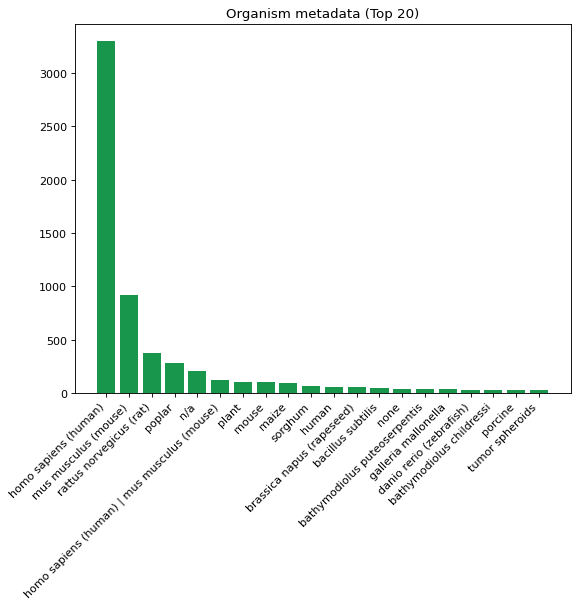

In [101]:
cd = Counter(metadata_dict['Organism'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('Organism metadata (Top 20)')
plt.show()

In [102]:
# merging dict values
metadata_dict['Organism'] = {k: ('mus musculus (mouse)' if v=='mouse' else v) 
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('arabidopsis' if v=='arabidopsis thaliana' else v) 
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('homo sapiens (human)' if v=='human' else v) 
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('homo sapiens (human)' if v=='homospaiens' else v) 
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('n/a' if v=='none' else v)
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('rattus norvegicus (rat)' if v=='rat' else v)
                             for k, v in metadata_dict['Organism'].items()}
metadata_dict['Organism'] = {k: ('mus musculus (mouse)' if v=='mice' else v)
                             for k, v in metadata_dict['Organism'].items()}

In [117]:
cd = Counter(metadata_dict['Organism'].values())
org_color_dict = {cd.most_common(12)[x][0]: sns.color_palette('Paired')[x] for x in range(12)}
org_color_dict

{'homo sapiens (human)': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'mus musculus (mouse)': (0.12156862745098039,
  0.47058823529411764,
  0.7058823529411765),
 'rattus norvegicus (rat)': (0.6980392156862745,
  0.8745098039215686,
  0.5411764705882353),
 'poplar': (0.2, 0.6274509803921569, 0.17254901960784313),
 'n/a': (0.984313725490196, 0.6039215686274509, 0.6),
 'homo sapiens (human) | mus musculus (mouse)': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 'plant': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'maize': (1.0, 0.4980392156862745, 0.0),
 'sorghum': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'brassica napus (rapeseed)': (0.41568627450980394,
  0.23921568627450981,
  0.6039215686274509),
 'bacillus subtilis': (1.0, 1.0, 0.6),
 'bathymodiolus puteoserpentis': (0.6941176470588235,
  0.34901960784313724,
  0.1568627450980392)}

**Orgaism_Part**

In [104]:
Counter(metadata_dict['Organism_Part'].values())

Counter({'brain': 689,
         'root tip': 29,
         'kidney': 1665,
         'lung': 240,
         'skin': 207,
         'leaf': 400,
         'liver': 451,
         'whole organism': 341,
         'gratric cancer tissue': 16,
         'spleen': 17,
         'n/a': 240,
         'omentum': 8,
         'spheroids': 26,
         'root': 255,
         'major part of liver tissue': 18,
         'rhizosphere': 1,
         'none': 46,
         'retina': 8,
         'gut': 3,
         'colonies': 54,
         'sarcoma': 1,
         'testis': 16,
         'neuron': 6,
         'cells': 45,
         'frond': 3,
         'bone': 6,
         'tissue section': 5,
         'hela': 3,
         'ovary': 224,
         'meristem': 1,
         'microbial colony': 49,
         'hacat cells': 6,
         'mesenchymal stromal cells': 2,
         'eye': 35,
         'lymph node': 243,
         'glioblastoma': 2,
         'root nodule': 1,
         'cd4+ t cells': 1,
         'seed': 76,
         'prost

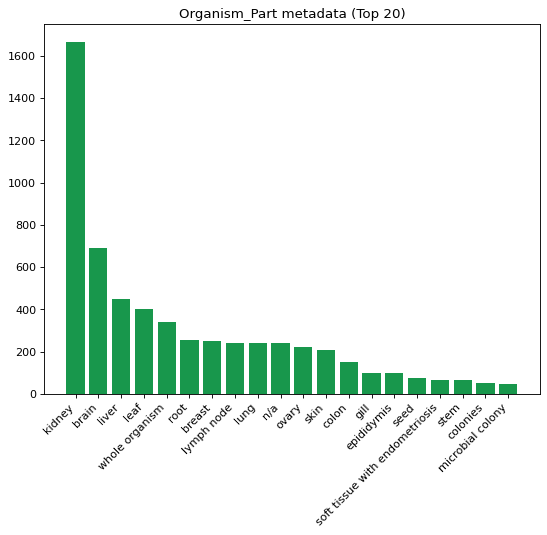

In [105]:
cd = Counter(metadata_dict['Organism_Part'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('Organism_Part metadata (Top 20)')
plt.show()

In [118]:
cd = Counter(metadata_dict['Organism_Part'].values())
tissue_color_dict = {cd.most_common(12)[x][0]: sns.color_palette('Paired')[x] for x in range(12)}
tissue_color_dict

{'kidney': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'brain': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'liver': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'leaf': (0.2, 0.6274509803921569, 0.17254901960784313),
 'whole organism': (0.984313725490196, 0.6039215686274509, 0.6),
 'root': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 'breast': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'lymph node': (1.0, 0.4980392156862745, 0.0),
 'lung': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'n/a': (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 'ovary': (1.0, 1.0, 0.6),
 'skin': (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)}

**Condition**

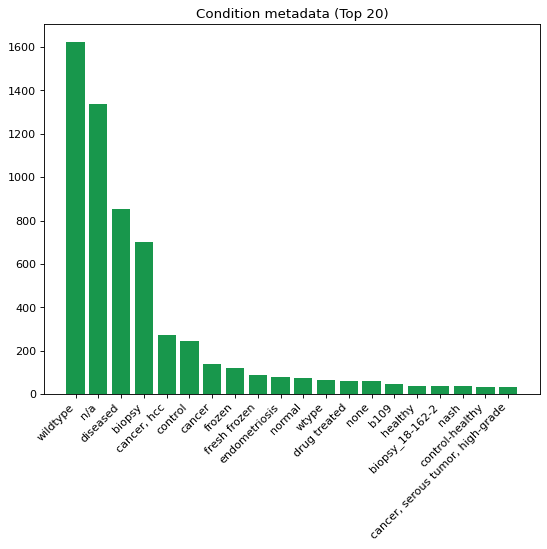

In [107]:
cd = Counter(metadata_dict['Condition'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('Condition metadata (Top 20)')
plt.show()

In [108]:
metadata_dict['Condition'] = {k: ('normal' if v=='wildtype' else v) 
                             for k, v in metadata_dict['Condition'].items()}
metadata_dict['Condition'] = {k: ('normal' if v=='wtype' else v) 
                             for k, v in metadata_dict['Condition'].items()}
metadata_dict['Condition'] = {k: ('normal' if v=='healthy' else v) 
                             for k, v in metadata_dict['Condition'].items()}

In [109]:
counter = Counter(metadata_dict['Condition'].values())
counter.most_common()

[('normal', 1801),
 ('n/a', 1337),
 ('diseased', 853),
 ('biopsy', 701),
 ('cancer, hcc', 271),
 ('control', 244),
 ('cancer', 141),
 ('frozen', 122),
 ('fresh frozen', 89),
 ('endometriosis', 80),
 ('drug treated', 62),
 ('none', 60),
 ('b109', 48),
 ('biopsy_18-162-2', 36),
 ('nash', 36),
 ('control-healthy', 34),
 ('cancer, serous tumor, high-grade', 32),
 ('tumor', 31),
 ('wild type', 24),
 ('sp (mycorrhizal w/ suillus pungens', 24),
 ('nm (non-mycorrhizal)', 24),
 ('coculture human hela with mouse nih3t3', 22),
 ('b73', 21),
 ('high-grade serous tumor', 21),
 ('infected, escovopsis', 19),
 ('pbs', 19),
 ('myasthenia gravis experimental animal eamg', 18),
 ('cancer tumor', 18),
 ('cancer, metastatic, gist', 18),
 ('treated', 15),
 ('staph a', 15),
 ('cancer control', 15),
 ('cancer, serous tumor, borderline', 15),
 ('interaction', 14),
 ('rt-shiv+', 13),
 ('cells in culture', 12),
 ('germ-free', 12),
 ('biopsy_020', 11),
 ('spf', 11),
 ('18-139-2', 11),
 ('control_024', 10),
 ('bio

In [119]:
counter = Counter(metadata_dict['Condition'].values())
cond_color_dict = {counter.most_common(12)[x][0]: sns.color_palette('Paired')[x] for x in range(12)}
cond_color_dict

{'normal': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'n/a': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'diseased': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'biopsy': (0.2, 0.6274509803921569, 0.17254901960784313),
 'cancer, hcc': (0.984313725490196, 0.6039215686274509, 0.6),
 'control': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 'cancer': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'frozen': (1.0, 0.4980392156862745, 0.0),
 'fresh frozen': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'endometriosis': (0.41568627450980394,
  0.23921568627450981,
  0.6039215686274509),
 'drug treated': (1.0, 1.0, 0.6),
 'none': (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)}

**Polarity**

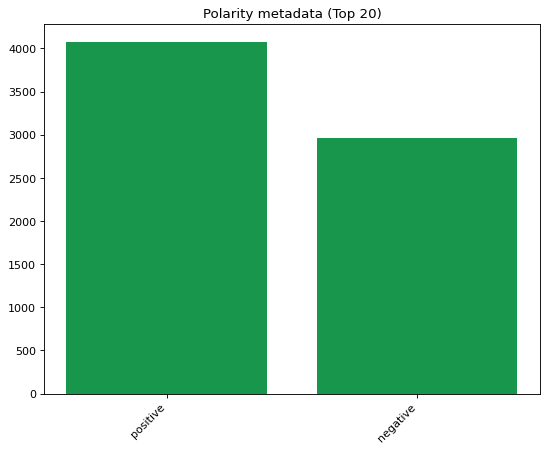

In [111]:
cd = Counter(metadata_dict['Polarity'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
#cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('Polarity metadata (Top 20)')
plt.show()

In [112]:
polarity_color_dict = {'positive': sns.color_palette('Paired')[0], 'negative': sns.color_palette('Paired')[5]}

**Group**

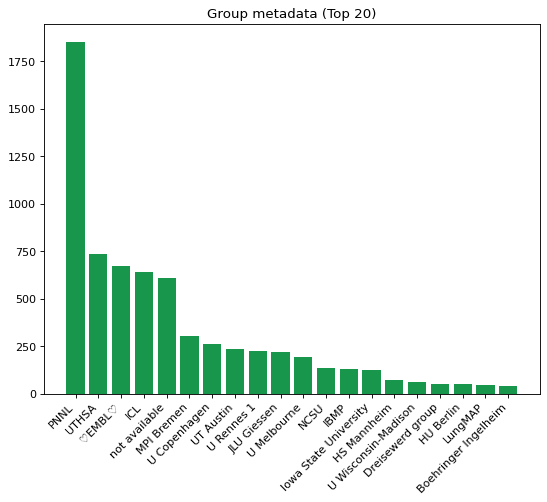

In [113]:
cd = Counter(metadata_dict['Group'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('Group metadata (Top 20)')
plt.show()

In [120]:
cd = Counter(metadata_dict['Group'].values())
group_color_dict = {cd.most_common(12)[x][0]: sns.color_palette('Paired')[x] for x in range(12)}
group_color_dict

{'PNNL': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'UTHSA': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 '♡EMBL♡': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'ICL': (0.2, 0.6274509803921569, 0.17254901960784313),
 'not available': (0.984313725490196, 0.6039215686274509, 0.6),
 'MPI Bremen': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 'U Copenhagen': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'UT Austin': (1.0, 0.4980392156862745, 0.0),
 'U Rennes 1': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'JLU Giessen': (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 'U Melbourne': (1.0, 1.0, 0.6),
 'NCSU': (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)}

**MALDI_matrix**

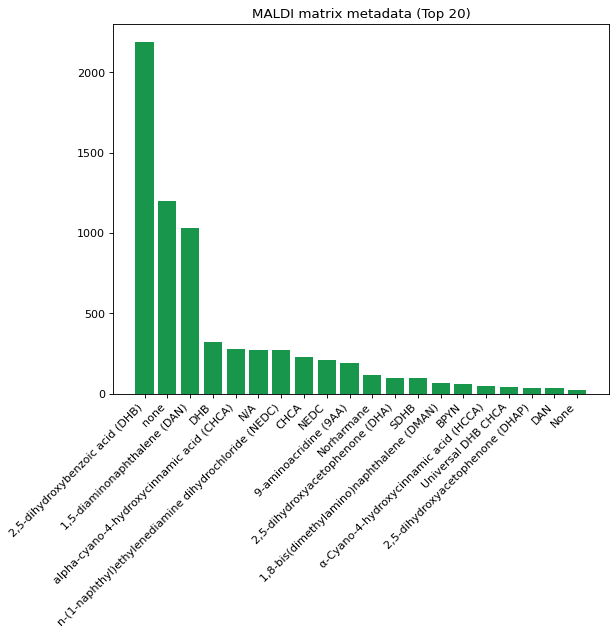

In [115]:
cd = Counter(metadata_dict['MALDI_matrix'].values())
cd=dict(sorted(cd.items(), key=lambda item: item[1], reverse=True))
cd= {list(cd.keys())[i]: list(cd.values())[i] for i in range(20)}
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(len(cd)), list(cd.values()), align='center', color='#18974C')
plt.xticks(range(len(cd)), list(cd.keys()), rotation = 45, ha='right')
plt.title('MALDI matrix metadata (Top 20)')
plt.show()

In [121]:
cd = Counter(metadata_dict['MALDI_matrix'].values())
matrix_color_dict = {cd.most_common(12)[x][0]: sns.color_palette('Paired')[x] for x in range(12)}
matrix_color_dict

{'2,5-dihydroxybenzoic acid (DHB)': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'none': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 '1,5-diaminonaphthalene (DAN)': (0.6980392156862745,
  0.8745098039215686,
  0.5411764705882353),
 'DHB': (0.2, 0.6274509803921569, 0.17254901960784313),
 'alpha-cyano-4-hydroxycinnamic acid (CHCA)': (0.984313725490196,
  0.6039215686274509,
  0.6),
 'N/A': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 'n-(1-naphthyl)ethylenediamine dihydrochloride (NEDC)': (0.9921568627450981,
  0.7490196078431373,
  0.43529411764705883),
 'CHCA': (1.0, 0.4980392156862745, 0.0),
 'NEDC': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 '9-aminoacridine (9AA)': (0.41568627450980394,
  0.23921568627450981,
  0.6039215686274509),
 'Norharmane': (1.0, 1.0, 0.6),
 '2,5-dihydroxyacetophenone (DHA)': (0.6941176470588235,
  0.34901960784313724,
  0.1568627450980392)}

## Tf-idf table

In [29]:
tfidf_sparse = pd.read_pickle('metaspacedata_300922/tfidf_sparse.pickle')

In [30]:
tfidf_sparse

,2017-03-24_11h29m56s.csv,2017-09-23_09h31m56s.csv,2016-10-01_12h23m04s.csv,2018-11-02_23h00m32s.csv,2021-05-27_22h31m50s.csv,2021-03-12_18h37m44s.csv,2017-11-13_17h29m37s.csv,2019-03-25_19h24m11s.csv,2018-11-02_15h40m47s.csv,2021-04-29_14h24m35s.csv,...,2021-11-05_11h01m03s.csv,2020-07-29_20h38m12s.csv,2020-01-06_22h04m12s.csv,2017-04-09_16h34m47s.csv,2016-11-22_02h03m27s.csv,2019-10-02_21h30m17s.csv,2017-11-16_10h06m33s.csv,2022-09-23_23h06m12s.csv,2021-06-16_18h21m33s.csv,2018-05-22_12h00m43s.csv
"(C41H81O10P, -H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C21H26N2O2S2, +Cl)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C19H34O15, +H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C22H32O8, +Na)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C9H17N3O4, -H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,267.845988,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(C18H34O3, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,261.246210,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C33H52O9, +H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C16H16N6O, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,304.838393,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C8H8O8S, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


**UMAP**

In [31]:
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(tfidf_sparse.transpose())

In [32]:
mapper.embedding_.shape

(6844, 2)

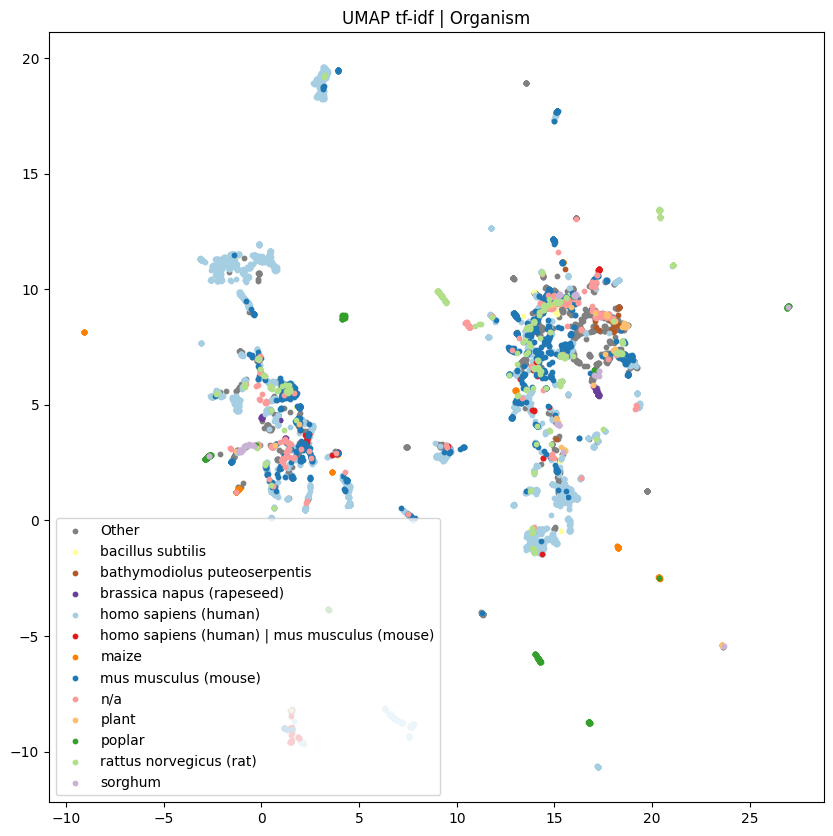

In [33]:
groups = np.array([metadata_dict['Organism'][x.split(".")[0]] if 
                   metadata_dict['Organism'][x.split(".")[0]] in org_color_dict.keys() 
          else "Other" for x in list(tfidf_sparse.columns)])
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = org_color_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | Organism')
plt.show()


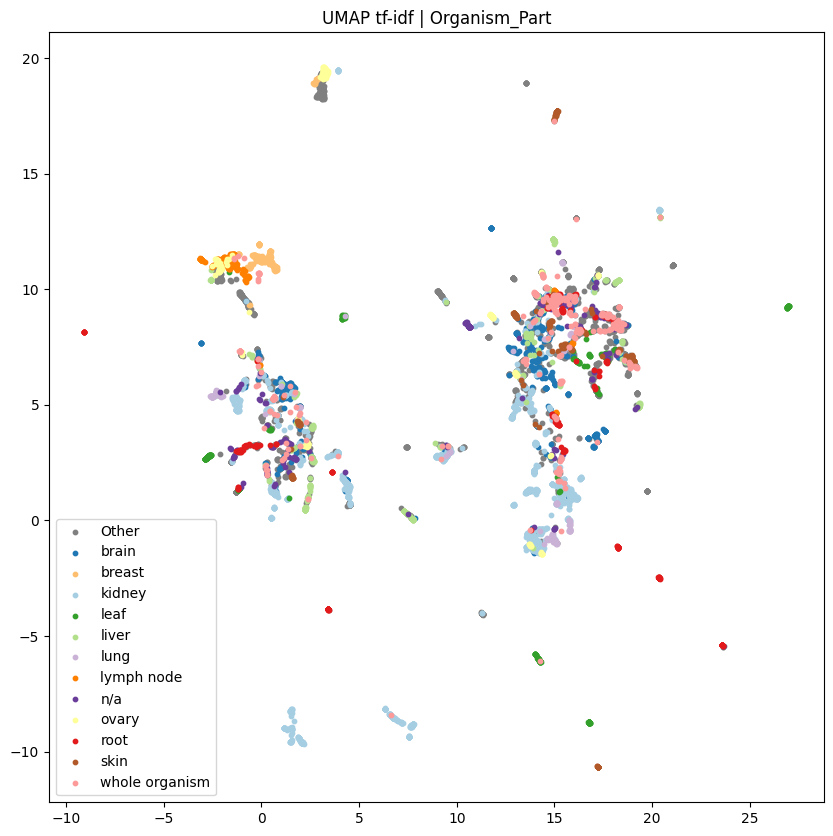

In [34]:
groups = np.array([metadata_dict['Organism_Part'][x.split(".")[0]] if 
                   metadata_dict['Organism_Part'][x.split(".")[0]] in tissue_color_dict.keys() else "Other" 
                   for x in list(tfidf_sparse.columns)])
# colmap = [org_color_dict.get(metadata_dict['Organism'][x.split(".")[0]], 'grey') for x in list(tfidf_sparse.columns)]
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = tissue_color_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | Organism_Part')
plt.show()

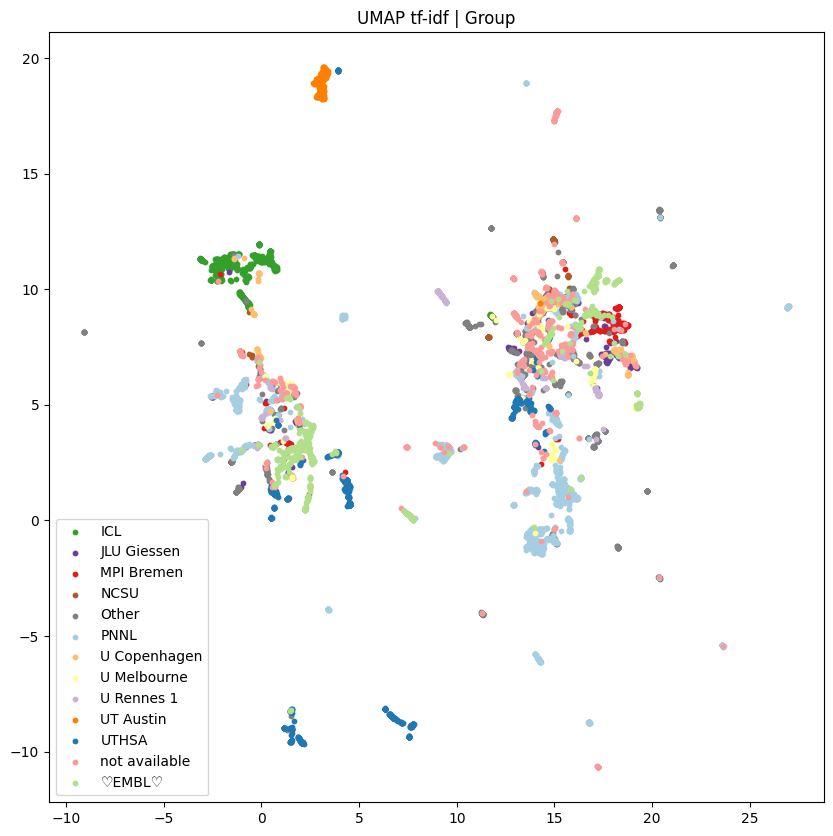

In [35]:
key = 'Group'
col_dict = group_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(tfidf_sparse.columns)])
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | ' + key)
plt.show()

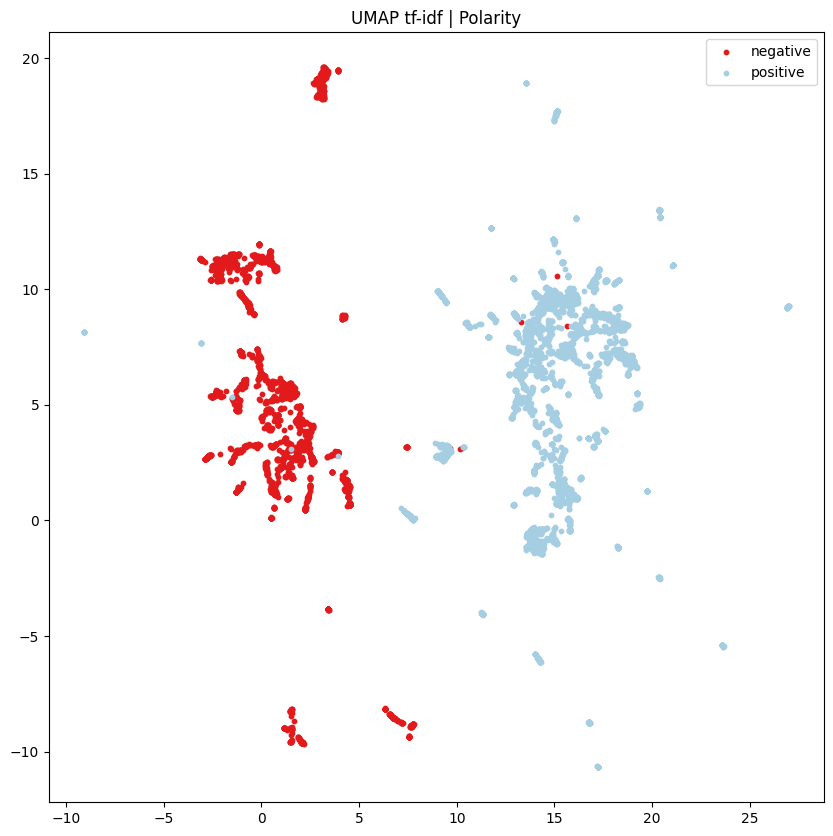

In [36]:
key = 'Polarity'
col_dict = polarity_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(tfidf_sparse.columns)])
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | ' + key)
plt.show()

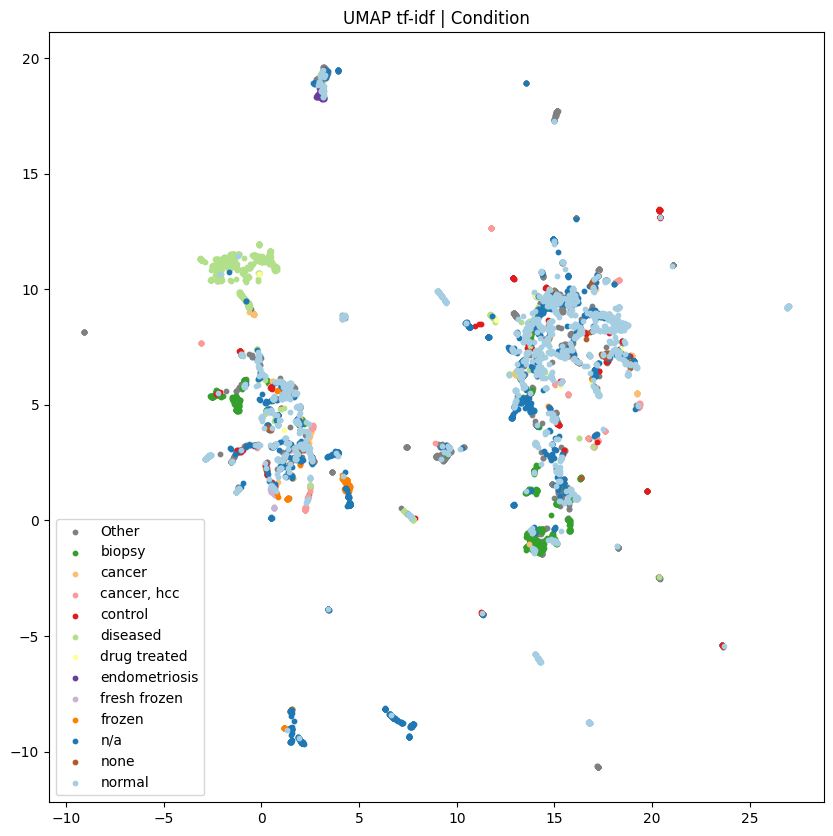

In [37]:
key = 'Condition'
col_dict = cond_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(tfidf_sparse.columns)])
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | ' + key)
plt.show()

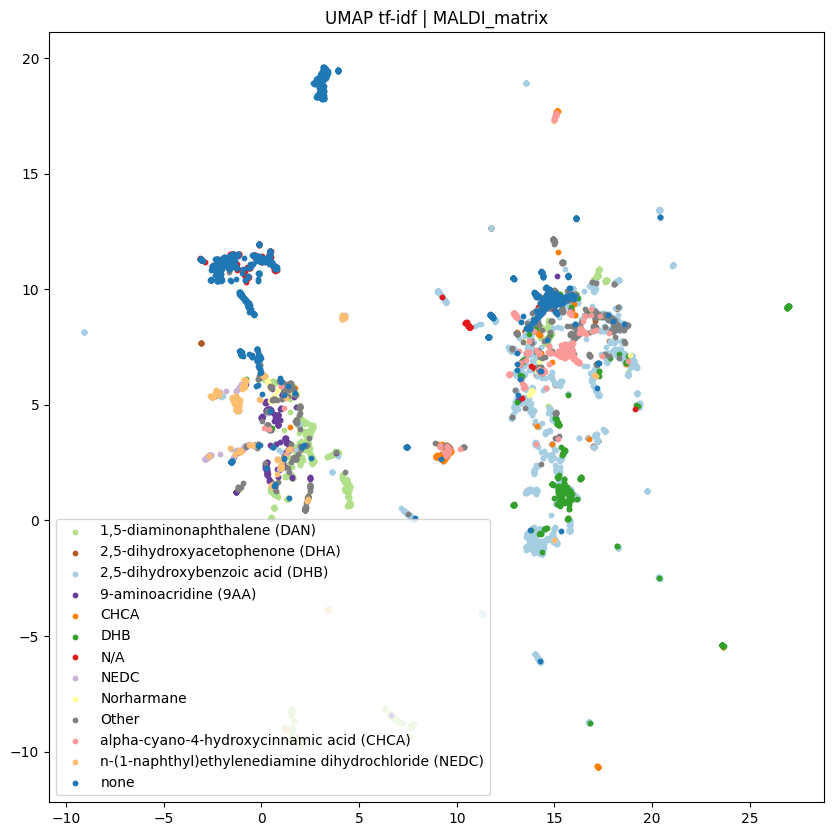

In [38]:
key = 'MALDI_matrix'
col_dict = matrix_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(tfidf_sparse.columns)])
fig, ax = plt.subplots(figsize=(10,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper.embedding_[ix, 0], mapper.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP tf-idf | ' + key)
plt.show()

**Similarity Network**

In [4]:
cosim = pickle.load(open( "tfidf_cosim_cutoff035.pickle", "rb" ) )

In [8]:
g = nx.from_numpy_matrix(cosim)
g.remove_edges_from(nx.selfloop_edges(g))

In [ ]:
pos = nx.spring_layout(g, k=.8)
nx.draw(g, pos=pos, with_labels=False)

In [21]:
nodes_to_remove = []
for comps in nx.connected_components(g):
    if len(comps) < 10:
        nodes_to_remove += list(comps)

In [23]:
len(nodes_to_remove)

2026

In [24]:
g.remove_nodes_from(nodes_to_remove)

In [25]:
len(g.edges())

160241

In [29]:
max(list(nx.connected_components(g)))

{2,
 13,
 18,
 21,
 25,
 35,
 37,
 44,
 50,
 51,
 57,
 60,
 61,
 62,
 82,
 84,
 88,
 91,
 100,
 103,
 109,
 111,
 115,
 120,
 121,
 122,
 127,
 129,
 138,
 145,
 156,
 159,
 161,
 167,
 179,
 189,
 192,
 195,
 207,
 208,
 211,
 213,
 216,
 221,
 224,
 238,
 242,
 251,
 253,
 255,
 264,
 280,
 281,
 283,
 289,
 290,
 291,
 299,
 300,
 309,
 312,
 317,
 327,
 332,
 334,
 344,
 347,
 349,
 359,
 362,
 371,
 379,
 386,
 396,
 397,
 400,
 404,
 407,
 409,
 411,
 421,
 424,
 428,
 432,
 435,
 440,
 449,
 451,
 462,
 465,
 468,
 469,
 471,
 472,
 476,
 478,
 479,
 481,
 488,
 495,
 496,
 501,
 515,
 522,
 523,
 527,
 528,
 544,
 550,
 551,
 555,
 559,
 562,
 569,
 571,
 572,
 576,
 577,
 582,
 593,
 594,
 595,
 597,
 598,
 602,
 604,
 606,
 612,
 622,
 629,
 631,
 633,
 634,
 657,
 659,
 666,
 668,
 672,
 676,
 677,
 679,
 681,
 682,
 687,
 696,
 699,
 715,
 716,
 734,
 743,
 747,
 764,
 775,
 784,
 785,
 797,
 800,
 802,
 803,
 804,
 809,
 810,
 811,
 817,
 818,
 822,
 823,
 828,
 830,
 831,

In [35]:
sum(cosim.flatten()>0)

330672

## Intensities

In [87]:
intensity_sparse = pd.read_pickle('metaspacedata_300922/intensityTIC_data_sparse_300922.pickle')

In [88]:
intensity_sparse

,2017-03-24_11h29m56s.csv,2017-09-23_09h31m56s.csv,2016-10-01_12h23m04s.csv,2018-11-02_23h00m32s.csv,2021-05-27_22h31m50s.csv,2021-03-12_18h37m44s.csv,2017-11-13_17h29m37s.csv,2019-03-25_19h24m11s.csv,2018-11-02_15h40m47s.csv,2021-04-29_14h24m35s.csv,...,2021-11-05_11h01m03s.csv,2020-07-29_20h38m12s.csv,2020-01-06_22h04m12s.csv,2017-04-09_16h34m47s.csv,2016-11-22_02h03m27s.csv,2019-10-02_21h30m17s.csv,2017-11-16_10h06m33s.csv,2022-09-23_23h06m12s.csv,2021-06-16_18h21m33s.csv,2018-05-22_12h00m43s.csv
"(C41H81O10P, -H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C21H26N2O2S2, +Cl)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C19H34O15, +H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C22H32O8, +Na)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C9H17N3O4, -H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000266,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(C18H34O3, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000379,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C33H52O9, +H)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C16H16N6O, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000072,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"(C8H8O8S, +K)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [89]:
mapper_intensity = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(intensity_sparse.transpose())

In [96]:
org_color_dict

{'normal': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'n/a': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'diseased': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'biopsy': (0.2, 0.6274509803921569, 0.17254901960784313),
 'cancer, hcc': (0.984313725490196, 0.6039215686274509, 0.6),
 'control': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 'cancer': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'frozen': (1.0, 0.4980392156862745, 0.0),
 'fresh frozen': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'endometriosis': (0.41568627450980394,
  0.23921568627450981,
  0.6039215686274509),
 'drug treated': (1.0, 1.0, 0.6),
 'none': (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)}

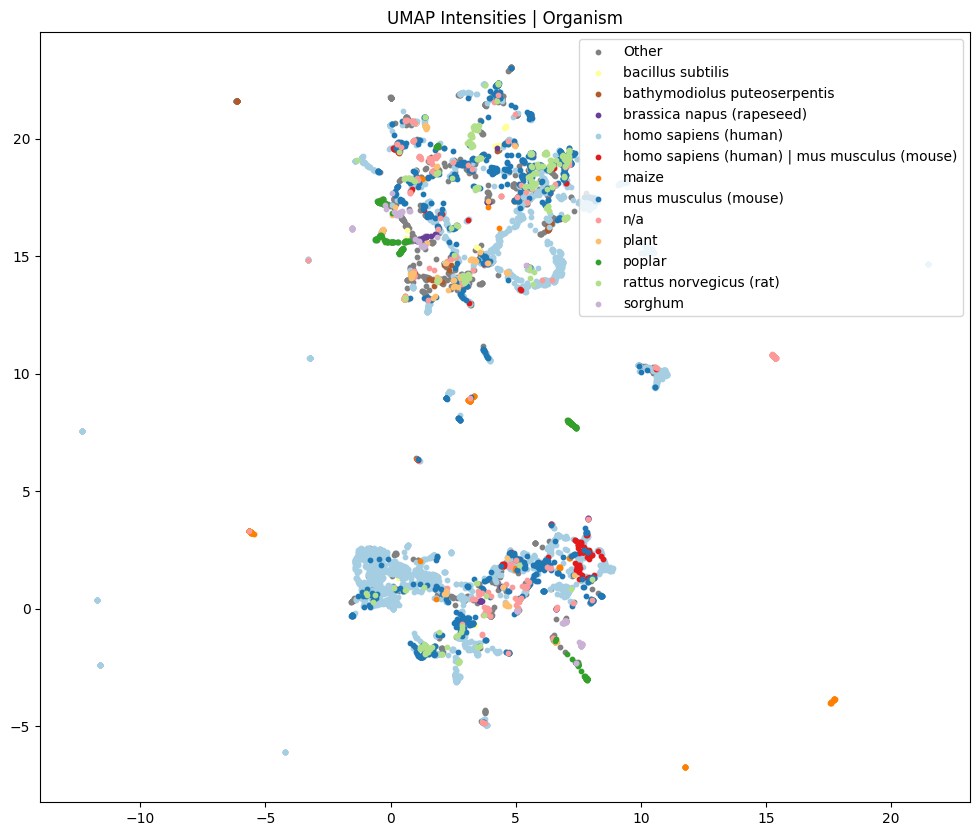

In [122]:
key = 'Organism'
col_dict = org_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

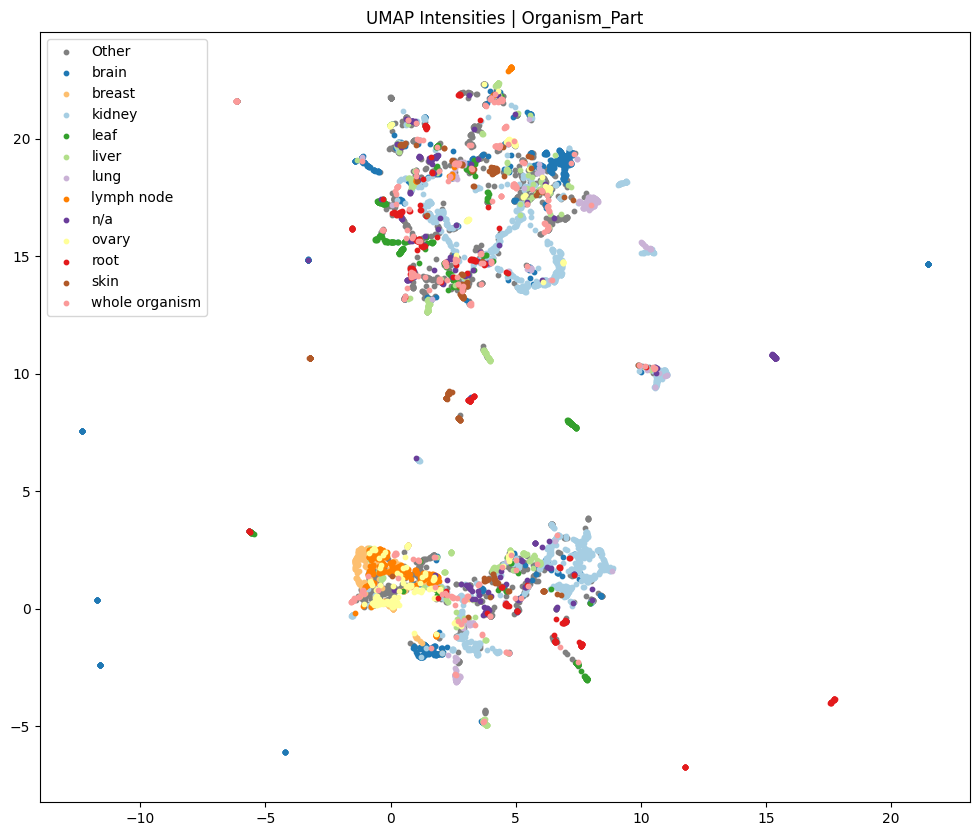

In [123]:
key = 'Organism_Part'
col_dict = tissue_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

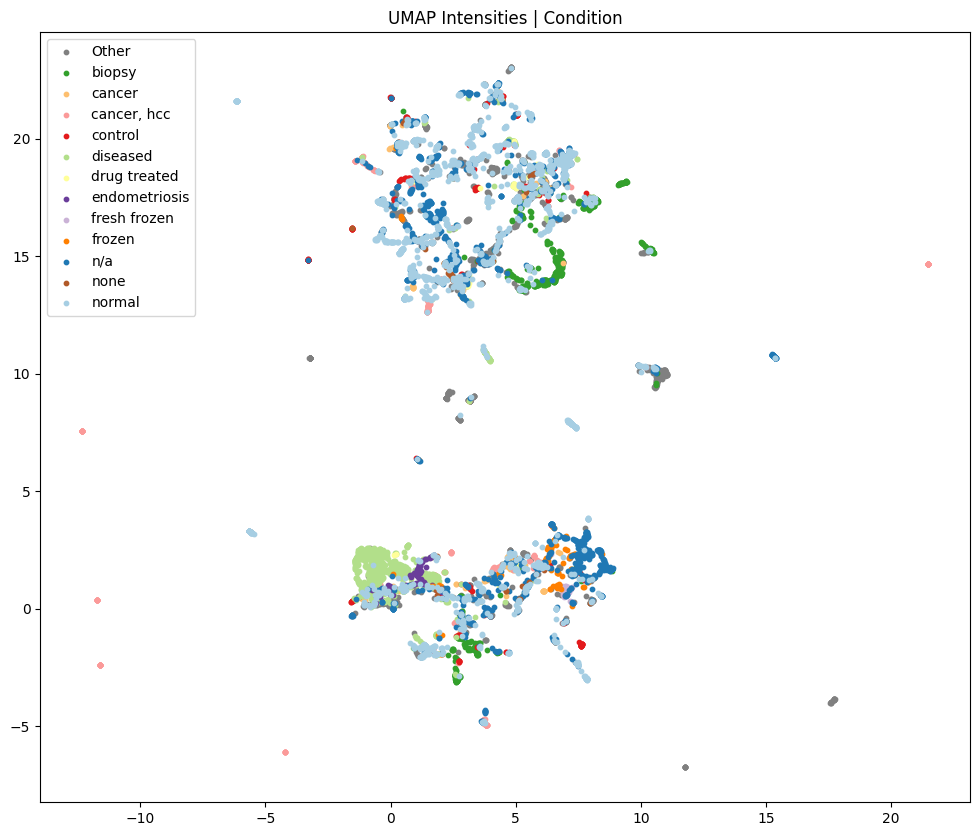

In [126]:
key = 'Condition'
col_dict = cond_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

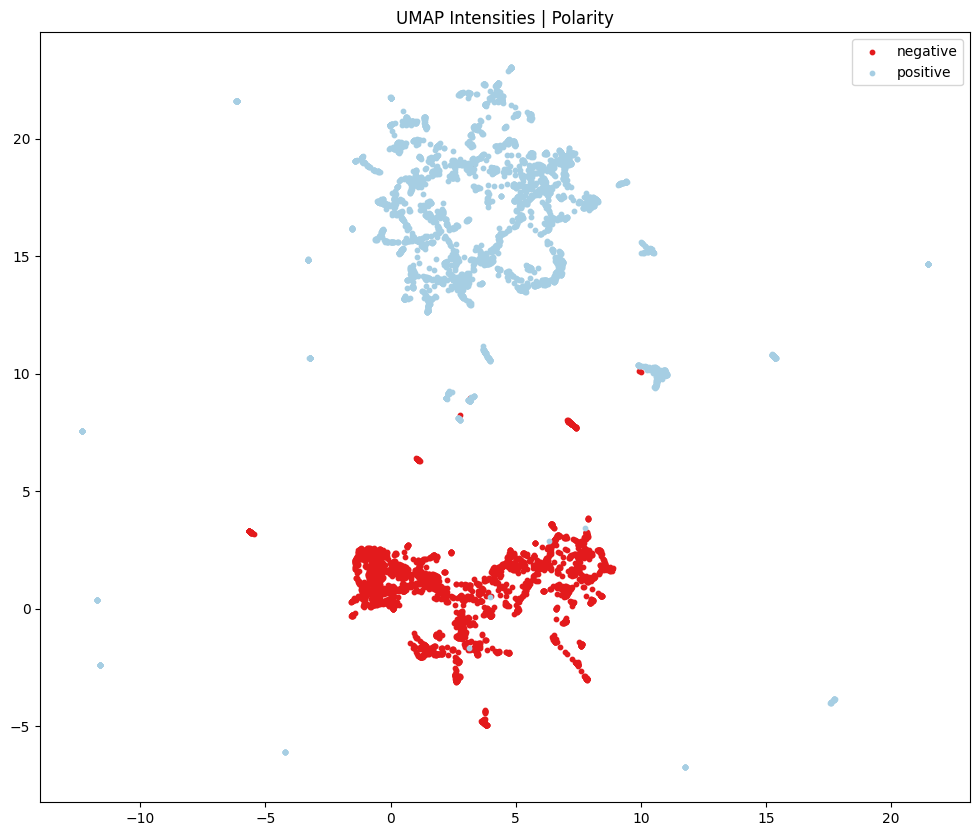

In [127]:
key = 'Polarity'
col_dict = polarity_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

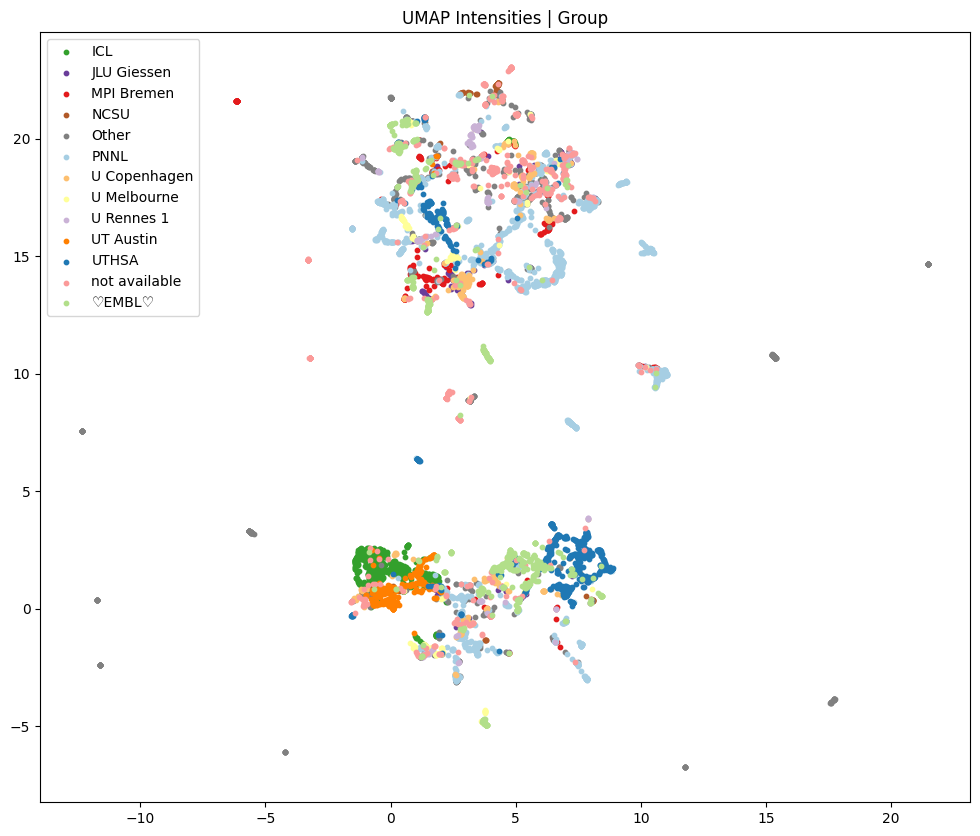

In [128]:
key = 'Group'
col_dict = group_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

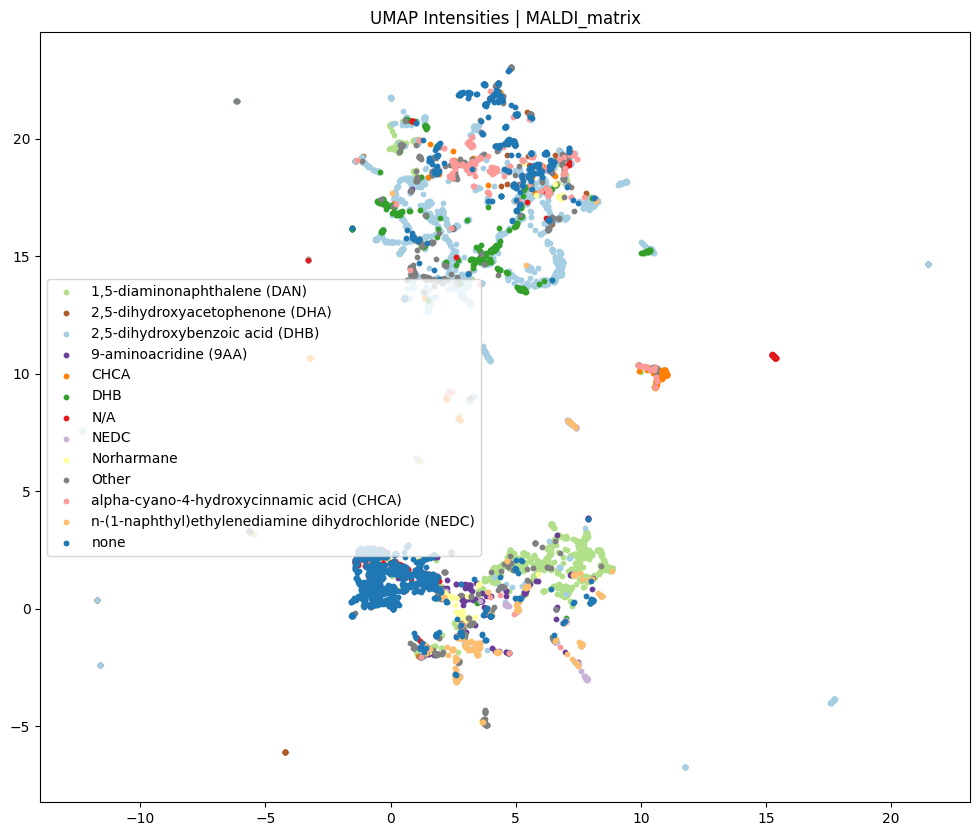

In [129]:
key = 'MALDI_matrix'
col_dict = matrix_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=10)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

Zoom in

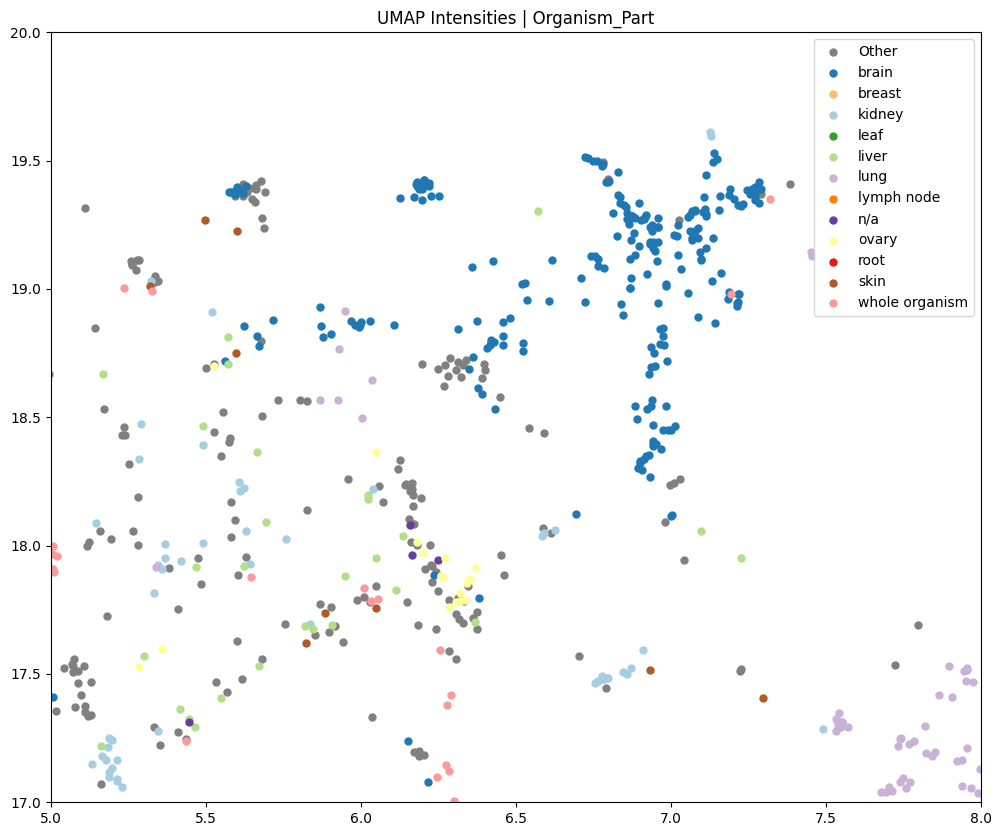

In [135]:
key = 'Organism_Part'
col_dict = tissue_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=25)
ax.set_xlim(5, 8)
ax.set_ylim(17,20)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

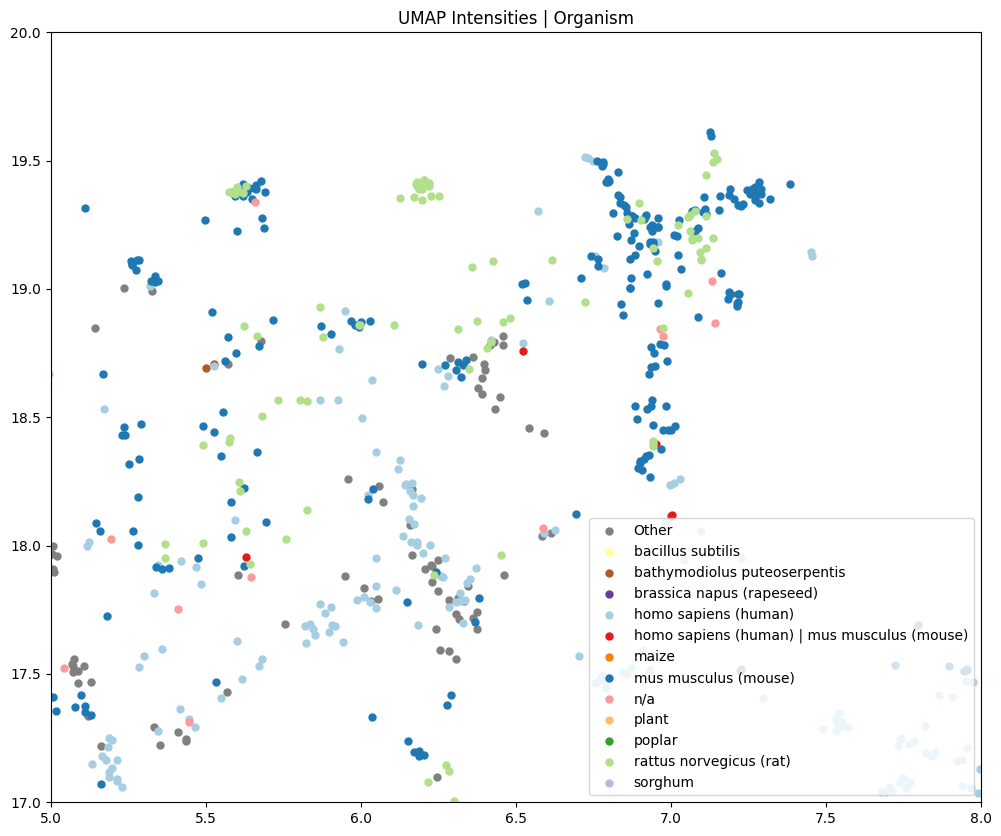

In [138]:
key = 'Organism'
col_dict = org_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=25)
ax.set_xlim(5, 8)
ax.set_ylim(17,20)
ax.legend(loc='lower right')
plt.title('UMAP Intensities | ' + key)
plt.show()

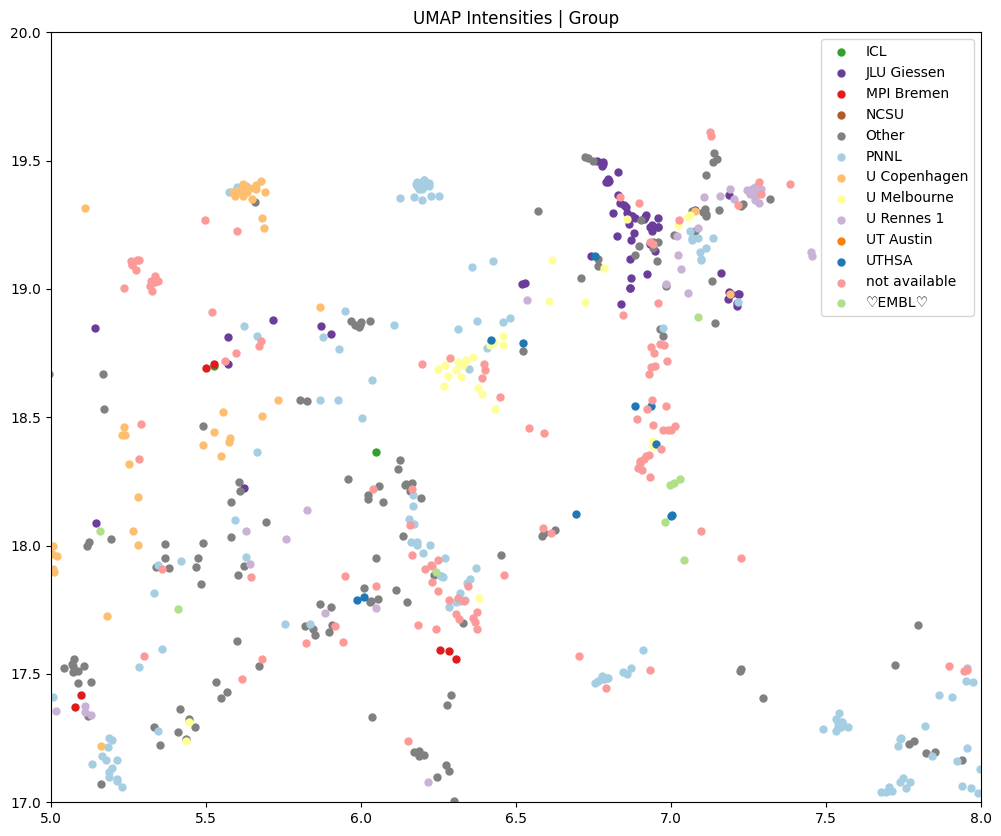

In [139]:
key = 'Group'
col_dict = group_color_dict
groups = np.array([metadata_dict[key][x.split(".")[0]] if 
                   metadata_dict[key][x.split(".")[0]] in col_dict.keys() else "Other" 
                   for x in list(intensity_sparse.columns)])
fig, ax = plt.subplots(figsize=(12,10))
for g in np.unique(groups):
    ix = np.where(np.array(groups) == g)
    ax.scatter( mapper_intensity.embedding_[ix, 0], mapper_intensity.embedding_[ix, 1], color = col_dict.get(g, 'grey'), 
               label = g, s=25)
ax.set_xlim(5, 8)
ax.set_ylim(17,20)
ax.legend()
plt.title('UMAP Intensities | ' + key)
plt.show()

In [134]:
intensity_sparse.shape

(75564, 6844)